In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    summations = np.sum(e_x, axis=1)
    summations = summations.reshape(len(summations), 1)    
    return e_x / summations

In [120]:
data = pd.DataFrame(pd.read_csv('iris.csv'))
inputs_df = pd.DataFrame(data)
inputs_df = data.drop(['species'], axis=1)
inputs_df["intercept"] = 1
inputs = np.array(inputs_df)
outputs = data["species"].astype("category").cat.codes
num_features = inputs.shape[1]
num_classes = len(np.unique(outputs))
outputs = np.array(pd.get_dummies(outputs))

In [121]:
logIterations = 100
def crossEntropy(targets, predictions):
    return -np.sum(targets * np.log(predictions))
def getAccuracy(targets, predictions):
    one_hots = np.eye(num_classes)
    discreteOneHot = one_hots[np.argmax(predictions, axis=1)]
    compared = (discreteOneHot==targets)
    correct = 0
    for r in range(len(compared)):
        if compared[r].all():
            correct = correct + 1
    accuracy = correct / len(targets)
    return accuracy
    #print (discreteOneHot == predictions)
def gradientDescent(learningRate, epochs):
    weights = np.array([[1] * num_features] * num_classes)
    cost_history = np.array([])
    accuracy_history = np.array([])
    for i in range(epochs):
        scores = inputs.dot(weights.T)
        predictions = softmax(scores)
        loss = predictions - outputs
        gradients = inputs.T.dot(loss)
        weights = weights - learningRate * gradients.T
        ce = crossEntropy(outputs, predictions)
        acc = getAccuracy(outputs, predictions) * 100
        cost_history = np.append(cost_history, [ce])
        accuracy_history = np.append(accuracy_history, [acc])
        if i%logIterations == 0:
            print ("Iteration: ", i, " Loss: ", ce, " Accuracy: ", acc, "%")
    return weights, cost_history, accuracy_history
iterations = 2000
weights, cost_history, accuracy_history = gradientDescent(0.0001, iterations)

Iteration:  0  Loss:  164.7918433  Accuracy:  33.33333333333333 %
Iteration:  100  Loss:  94.7685032113  Accuracy:  70.66666666666667 %
Iteration:  200  Loss:  77.7388726647  Accuracy:  86.66666666666667 %
Iteration:  300  Loss:  69.2060492117  Accuracy:  92.0 %
Iteration:  400  Loss:  63.5143688745  Accuracy:  94.0 %
Iteration:  500  Loss:  59.1912249604  Accuracy:  96.66666666666667 %
Iteration:  600  Loss:  55.6797629883  Accuracy:  96.66666666666667 %
Iteration:  700  Loss:  52.7162781668  Accuracy:  96.66666666666667 %
Iteration:  800  Loss:  50.1550359983  Accuracy:  96.66666666666667 %
Iteration:  900  Loss:  47.9058356796  Accuracy:  96.66666666666667 %
Iteration:  1000  Loss:  45.9079054758  Accuracy:  96.66666666666667 %
Iteration:  1100  Loss:  44.1176227829  Accuracy:  96.66666666666667 %
Iteration:  1200  Loss:  42.5021681037  Accuracy:  96.66666666666667 %
Iteration:  1300  Loss:  41.0359751791  Accuracy:  97.33333333333334 %
Iteration:  1400  Loss:  39.6986041624  Accura

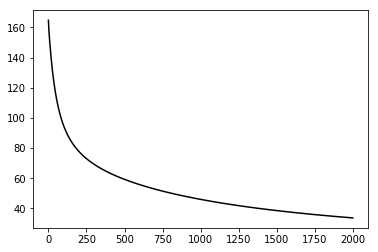

In [122]:

plt.plot (range(iterations), cost_history, 'k-')

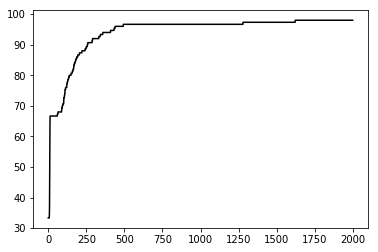

In [123]:
plt.plot (range(iterations), accuracy_history, 'k-')